### <font color="green">Steps</font> 
#### Raw Data -> Data Prep, EDA, Feature Engineering -> Build Model Evaluate Interpret -> Productionize Model -> Deploy Model Monitor -> End User Feedback

In [1]:
# EDA Packages
import pandas as pd
import numpy as np

In [2]:
# Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [3]:
# Load the dataset
df = pd.read_csv('data/hepatitis.data')

In [4]:
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [5]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS",
             "ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [6]:
df = pd.read_csv('data/hepatitis.data', names=col_names)

In [7]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [8]:
# Cleaninig of column names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [9]:
# Convert to lower case
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [11]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [12]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [13]:
df = df.replace('?',0)

In [14]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [15]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [16]:
# Converting from one datatype to other(object to int)
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [17]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [18]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype('float')

In [19]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

In [20]:
# Count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [21]:
# Shape of dataset
df.shape

(155, 20)

In [22]:
# Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

## <b>EDA</b>

In [23]:
# Descriptive Analysis

df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [24]:
target_label = {'Die':1, "Live":2}

In [25]:
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

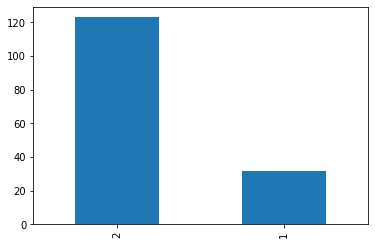

In [26]:
# Plot for count
df['class'].value_counts().plot(kind='bar')

In [27]:
# How many are males/1 & females/2
df['sex'].unique()

array([2, 1], dtype=int64)

In [28]:
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

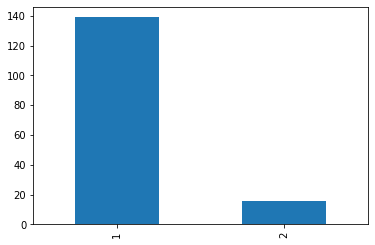

In [29]:
df['sex'].value_counts().plot(kind='bar')

In [30]:
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

### Frequency distribution table using the age range

In [31]:
df['age'].max()

78

In [32]:
df['age'].min()

7

In [33]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()    #Pandas cut() function is used to separate the array elements into different bins 

In [34]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [35]:
freq_df = freq_df.reset_index(name='count')

In [36]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


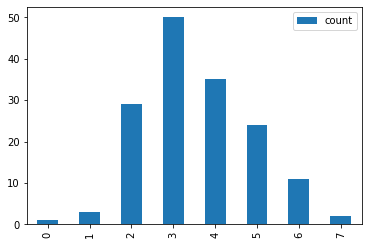

In [37]:
freq_df.plot(kind='bar')

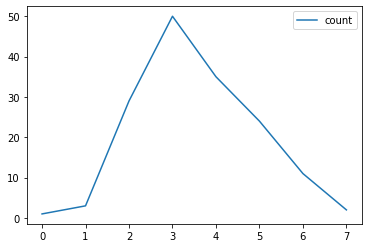

In [38]:
freq_df.plot(kind='line')

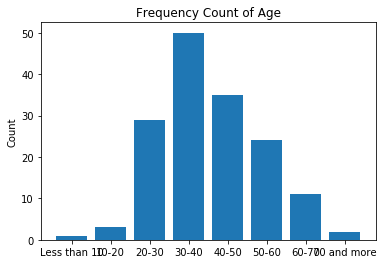

In [39]:
# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Count')
plt.title('Frequency Count of Age')
plt.show()

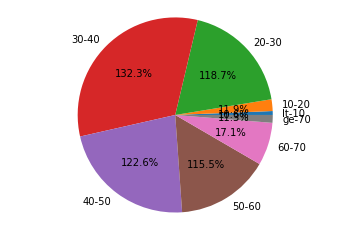

In [40]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Checking for Outliers

- Univariate Analysis
- Multivariate Analysis

### Methods

- Boxplot(Uni.)
- Scatter plot(Multi.)
- Z-score()
- IQR Interquartile Range

In [41]:
# Using Boxplot for Univariate Outlier Detection
import seaborn as sns

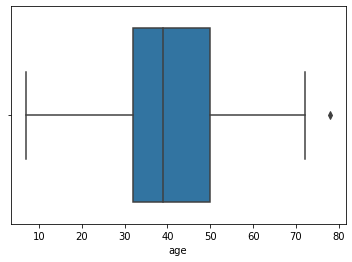

In [42]:
sns.boxplot(df['age'])

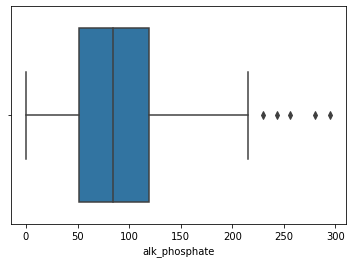

In [43]:
sns.boxplot(df['alk_phosphate'])

In [44]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


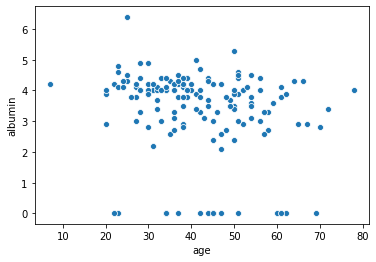

In [45]:
# Scatter Plot
sns.scatterplot(df['age'],df['albumin'])

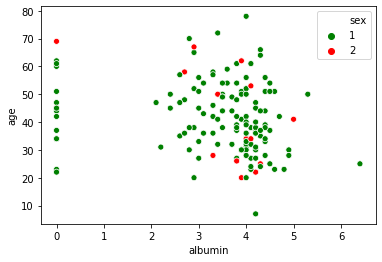

In [46]:
sns.scatterplot(x=df['albumin'], y=df['age'], hue=df['sex'], palette=['green','red'], data=df)

#### Using Interquartile Range(IQR)

- H-Spread/Mid_spread
- Measures the statistical dispersion/spread
- IQR = Quantile 3(75) - Quantile 1(25)

In [47]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [48]:
IQR = q3 - q1

In [49]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [50]:
### Getting Actual data points that is in outliers
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


#### Narative
- The data points with true are the outlier

#### Solution
- Remove
- Change
- Ignore

In [51]:
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [52]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [53]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


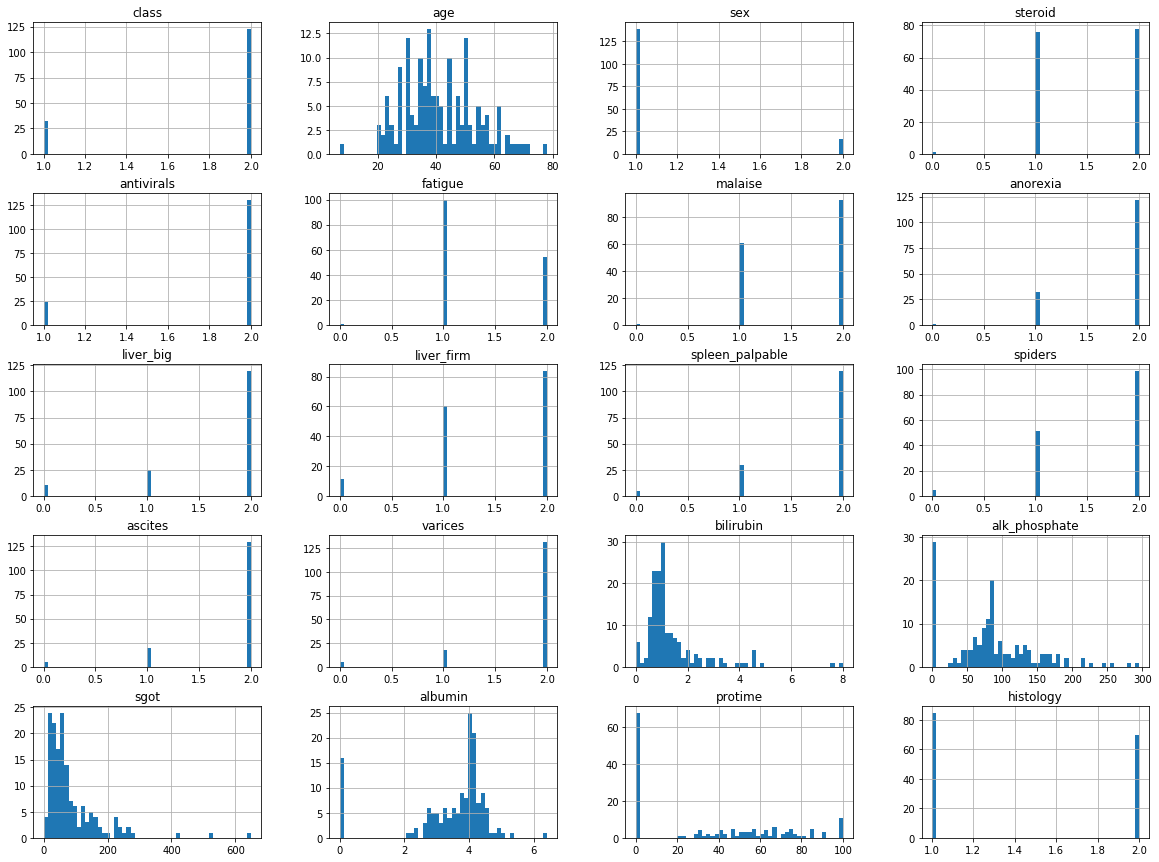

In [54]:
# Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

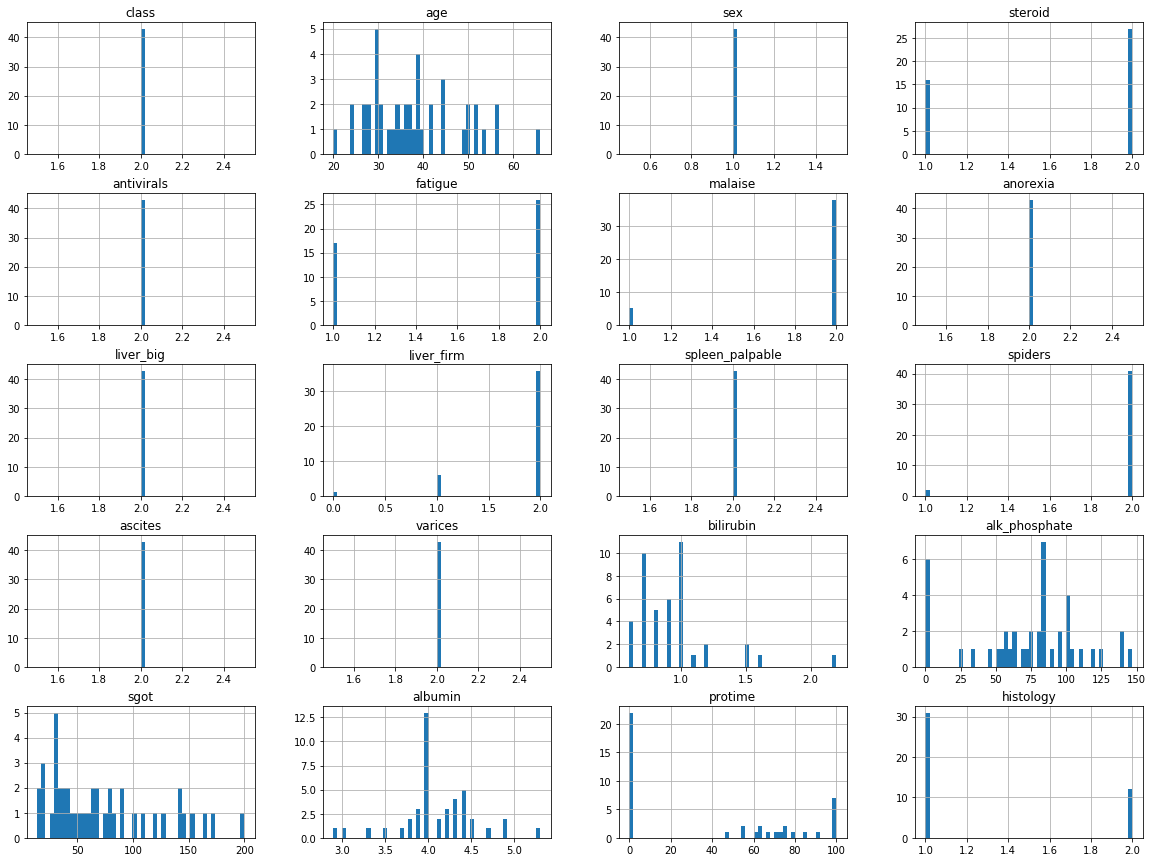

In [55]:
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

#### Feature Selection and Importance
- SelectKbest
    - Strong relation with the output/target
- Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
# Features & Labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [58]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [59]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [60]:
# Using SKBest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

In [61]:
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [62]:
bf_02 = best_feature_fit.transform(xfeatures)

In [63]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [64]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [65]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [66]:
feature_column_names = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [67]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [68]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [69]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [70]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [71]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

### Recursive Feature Elimination

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [73]:
logit = LogisticRegression()

In [74]:
rfe = RFE(logit,8)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [75]:
rfe_fit = rfe.fit(xfeatures, ylabels)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

In [76]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [77]:
rfe_feature_df = pd.concat([feature_column_names,selected_features, ranking_features],axis=1)

In [78]:
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


#### Narative
- RFE we will eliminate the lowest ranting or true

#### Checking for Feature Importance
- ExtraTreeClassifier
- Which feature is important

In [79]:
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [81]:
# Print Important
print(et_clf.feature_importances_)

[0.05612403 0.02350774 0.02449463 0.0123709  0.029187   0.04379115
 0.02313937 0.0393122  0.05351825 0.04190976 0.07964192 0.09027332
 0.04639392 0.09568125 0.06965841 0.05642253 0.07972154 0.06572528
 0.06912681]


In [82]:
feature_importance_df = pd.Series(et_clf.feature_importances_,index = xfeatures.columns)

In [83]:
feature_importance_df

age                0.056124
sex                0.023508
steroid            0.024495
antivirals         0.012371
fatigue            0.029187
malaise            0.043791
anorexia           0.023139
liver_big          0.039312
liver_firm         0.053518
spleen_palpable    0.041910
spiders            0.079642
ascites            0.090273
varices            0.046394
bilirubin          0.095681
alk_phosphate      0.069658
sgot               0.056423
albumin            0.079722
protime            0.065725
histology          0.069127
dtype: float64

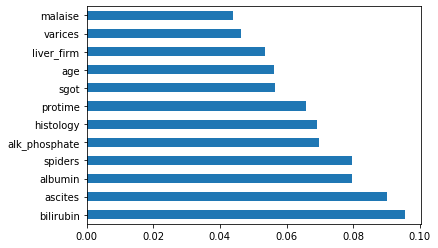

In [84]:
feature_importance_df.nlargest(12).plot(kind='barh')

#### Narrative
- All the methods gave us almost the same features to use

In [85]:
# Correlation
print(df.corr)

<bound method DataFrame.corr of      class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0        2   30    2        1           2        2        2         2   
1        2   50    1        1           2        1        2         2   
2        2   78    1        2           2        1        2         2   
3        2   31    1        0           1        2        2         2   
4        2   34    1        2           2        2        2         2   
..     ...  ...  ...      ...         ...      ...      ...       ...   
150      1   46    1        2           2        1        1         1   
151      2   44    1        2           2        1        2         2   
152      2   61    1        1           2        1        1         2   
153      2   53    2        1           2        1        2         2   
154      1   43    1        2           2        1        2         2   

     liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  \
0            1   

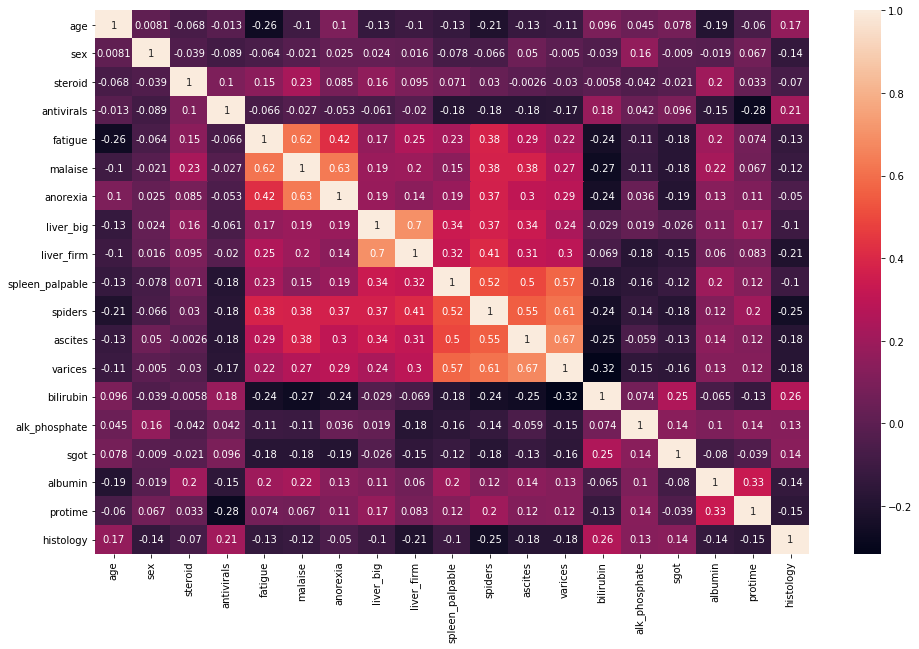

In [86]:
# Heatmap for correlation with annot
plt.figure(figsize=(16,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

#### Model Building
- Feature & Labels
- Train/Test/Split
- LogisticRegression
- RF
- DCT
- Serialize

In [87]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [88]:
# Features for Initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [89]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [90]:
ylabels = df['class']

In [91]:
# Selected Features
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [92]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [93]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

In [94]:
# train /test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=7)

In [95]:
#Building Model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [96]:
# Model Accuracy
# Method 1
logreg.score(x_test,y_test)

0.723404255319149

In [97]:
# Method 2
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [98]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [99]:
accuracy_score(y_test,logreg.predict(x_test))

0.723404255319149

In [100]:
#Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [101]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b,y_test_b)

0.723404255319149

In [102]:
# Method 2
model_logit.predict(x_test_b)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [103]:
### Single Prediction
x_test.iloc[1]

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [104]:
res_dic = {"Die":1,"Live":2}
x1 = x_test.iloc[1]

In [105]:
# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

### Alternative Algorithms

In [106]:
clf = DecisionTreeClassifier()

In [107]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier()

In [108]:
# Model Accuracy Score
clf.score(x_test_b,y_test_b)

0.7872340425531915

In [109]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn =  KNeighborsClassifier(n_neighbors=3)

In [111]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [112]:
# Model Accuracy Score
knn.score(x_test_b,y_test_b)

0.7446808510638298

#### Save Our Model
- Serialization
- Pickle
- Joblib
- numpy/json/ray

In [113]:
# Using Joblib
import joblib

model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(model_logit,model_file)
model_file.close()

model_file_knn = open("knn_hepB_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()

model_file_clf = open("decision_tree_clf_hepB_model.pkl","wb")
joblib.dump(clf,model_file_clf)
model_file_clf.close()


In [114]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus


In [115]:
feature_names_best = xfeatures_best.columns

In [116]:
target_names = ["Die","Live"]

In [117]:
# Create A Dot Plot
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names_best,class_names=target_names)


In [118]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

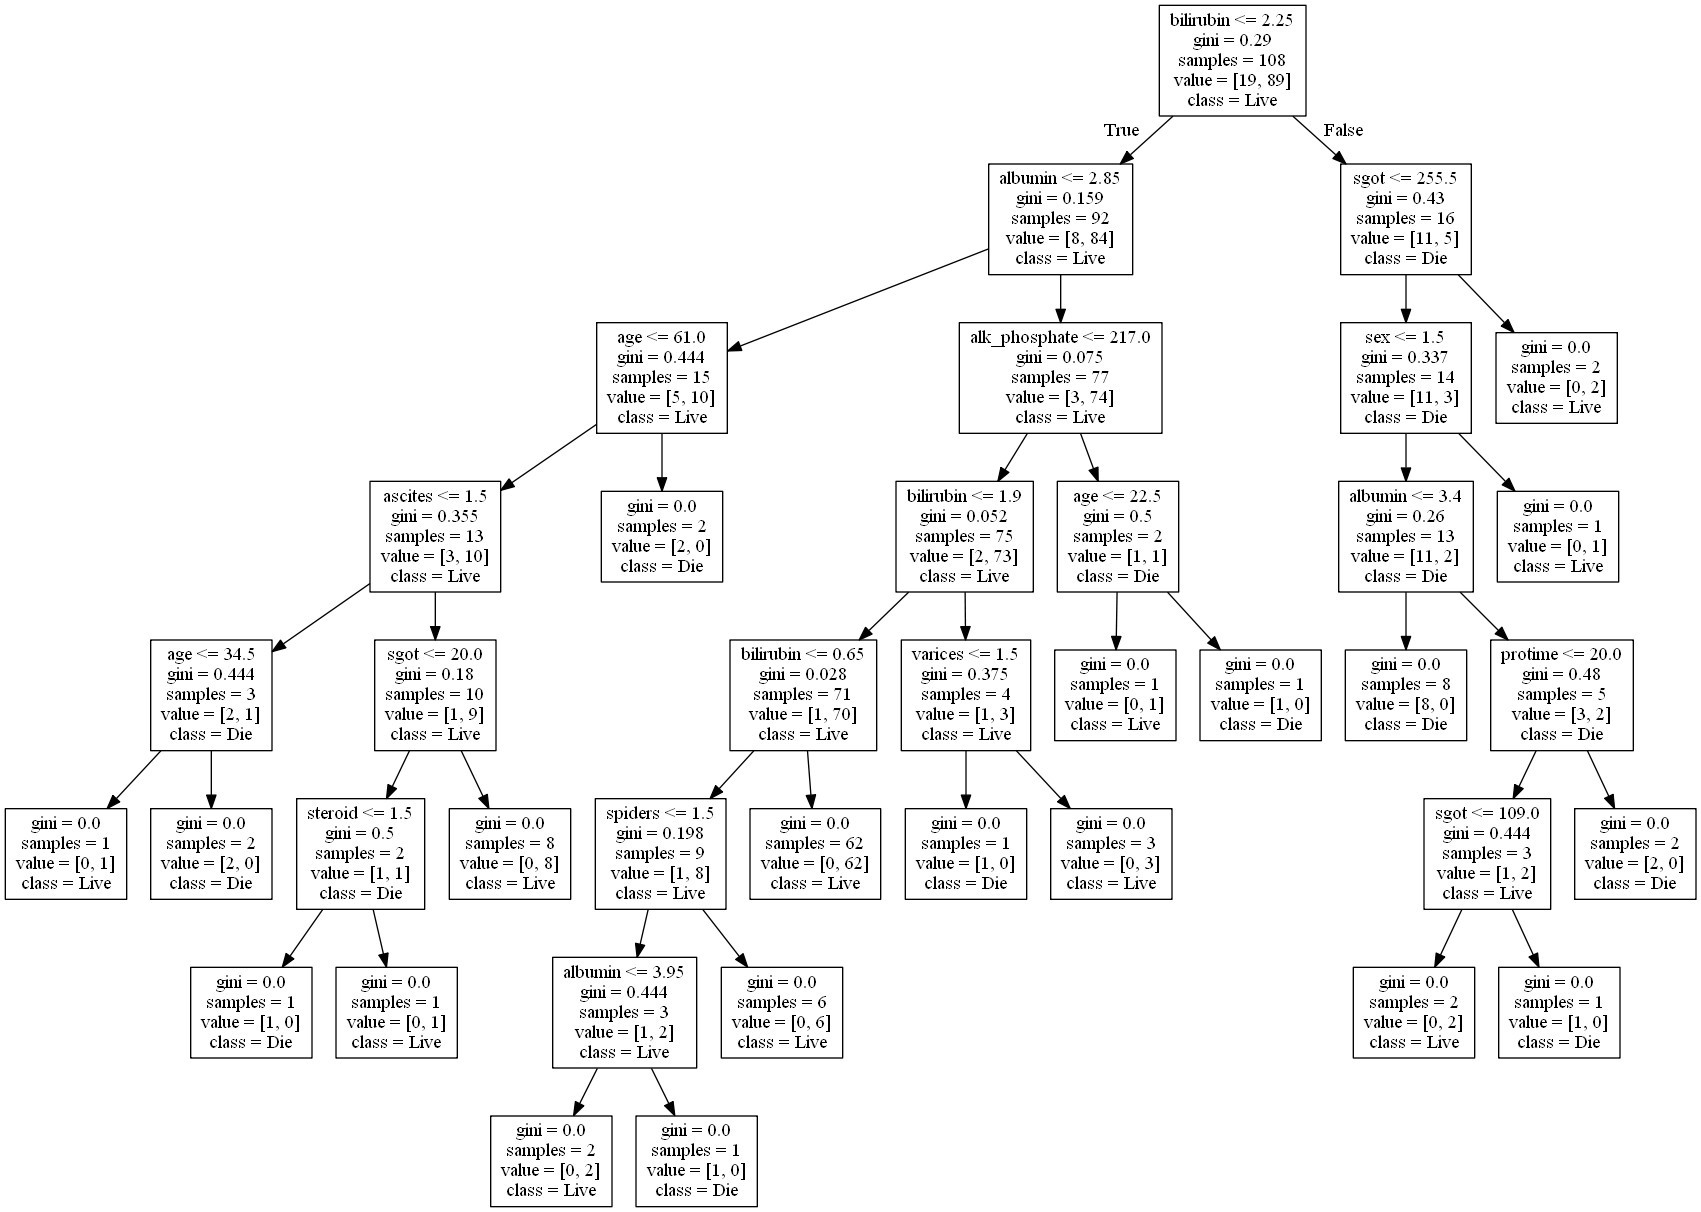

In [119]:
Image(graph.create_png())

In [120]:
# Save the plot
graph.write_png("hep_decisition_tree_plot.png")

True

#### Interpret Model & Evaluate
- Eli5
- Lime
- SHAP
- Skater

In [121]:
!pip install lime

In [122]:
# Intepreting with Lime
import lime
import lime.lime_tabular

In [123]:
# Methoda & Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

### Create Lime Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [124]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [125]:
target_names

['Die', 'Live']

In [126]:
class_names = ["Die(1)","Live(2)"]

In [127]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
                                                   feature_names=feature_names_best,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [128]:
x1

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [129]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [130]:
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

exp = explainer.explain_instance(x_test_b.iloc[1],model_logit.predict_proba,num_features=14,top_labels=1)

exp.show_in_notebook(show_table=True,show_all=False)

# Explanation as list
exp.as_list()

[('bilirubin > 1.50', -0.43232753559526793),
 ('sex <= 1.00', -0.2225383899603036),
 ('spiders <= 1.00', -0.13379438908158314),
 ('sgot > 90.50', 0.10767212592761612),
 ('alk_phosphate > 119.25', -0.10463610062906507),
 ('histology <= 1.00', 0.10452074854645992),
 ('age > 50.25', -0.05372367146804247),
 ('protime <= 0.00', 0.0488130022388776),
 ('1.50 < steroid <= 2.00', 0.04591305984255273),
 ('2.98 < albumin <= 4.00', 0.03979641059586981),
 ('fatigue <= 1.00', 0.024010811750965182),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0)]

In [131]:
### Using Eli5

import warnings
warnings.filterwarnings('ignore')
!pip install eli5
import eli5

# Show how each feature contributes
eli5.show_weights(model_logit,top=1)

In [132]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [133]:
# Show how each feature contributes
eli5.show_weights(model_logit,feature_names=feature_names_best,target_names=class_names)

Weight?,Feature
+1.139,sex
+0.747,spiders
+0.577,ascites
+0.502,albumin
+0.270,steroid
+0.018,<BIAS>
+0.004,sgot
-0.005,protime
-0.006,alk_phosphate
-0.016,age


In [134]:
# Show how each feature contributes
eli5.show_prediction(model_logit,x_test_b.iloc[1],feature_names=feature_names_best,target_names=class_names)

#### Evaluation of Model
+ Confuion Matrix
+ Classification Report
+ Accuracy core

![](confusionmatrix_image.jpg)

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
y_pred = model_logit.predict(x_test_b)

In [137]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.723404255319149

In [138]:
# Using Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 2, 11],
       [ 2, 32]], dtype=int64)

In [139]:
# Plot
from sklearn.metrics import plot_confusion_matrix

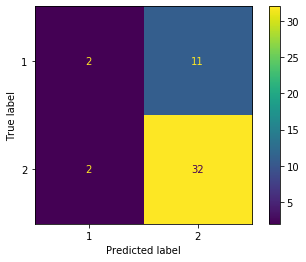

In [140]:
plot_confusion_matrix(model_logit,x_test_b,y_test_b)

In [141]:
tp,tf,fn,tn = confusion_matrix(y_test,y_pred).ravel()

In [142]:
tp

2

In [143]:
### Classification report
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [145]:
class_names

['Die(1)', 'Live(2)']

In [146]:
print(classification_report(y_test,y_pred,target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.50      0.15      0.24        13
     Live(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47

